<a href="https://colab.research.google.com/github/XLDiaz/MLearning_HEConsumption/blob/main/Limpieza_de_Datos_y_Visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar Datos & Preprocesamiento:


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly as py #pip install plotly
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#   Importar el archivo y eliminar las columnas q no se necesitan
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'Fecha': [0,1]}, index_col="Fecha")


#   Quitar "features" innecesarias:
df.drop(['Sub_metering_2','Sub_metering_3', 'Sub_metering_1',"Global_reactive_power", "Voltage", "Global_intensity"], axis=1, inplace=True)

#   Renombrando las columnas:
df = df.rename(columns={
    'Global_active_power': 'Potencia_Activa'
    })

#   Seleccionar la parte del dataset que se va a utilizar:
#   (1/1/2007 -> 31/10/2010)
# df = df.iloc[21996:2037996]
df = df.loc["2007-01":"2010-10"]

#   Fijar a NaN los valores perdidos:
df.replace('?', np.nan, inplace=True)

df.head()

,Potencia_Activa
Fecha,
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554


In [ ]:
#   Cambiar el tipo de dato de las columnas (objeto -> float):
df['Potencia_Activa'] = df['Potencia_Activa'].astype(float)

#   Fijar la media en los NaN fijados:
"""
Este metodo mantiene la media de los datos
"""
data_without_nan = df['Potencia_Activa'].dropna(axis=0)
data_mean = data_without_nan.mean()
df.replace(np.nan, data_mean, inplace=True)

#   Llevando el consumo a KW/H
# df['Potencia_Activa'] = df['Potencia_Activa']/60

df.head()

,Potencia_Activa
Fecha,
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554


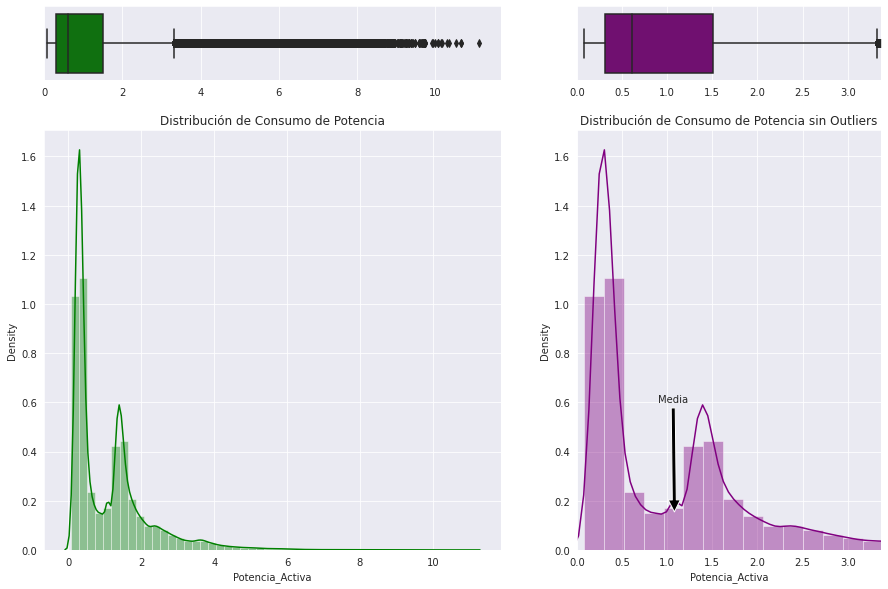

In [ ]:
# Crear subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(df['Potencia_Activa'] , color="green", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Main distribution
sns.distplot(df['Potencia_Activa'] , color="green", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribución de Consumo de Potencia')

#Zoom boxplot
sns.boxplot(df['Potencia_Activa'], color="purple", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

#Zoom distribution
sns.distplot(df['Potencia_Activa'], color="purple", ax=axes[1,1])
axes[1,1].set_title('Distribución de Consumo de Potencia sin Outliers')
axes[1,1].set_xlim(0, 3.37) 

# Add an arrow to mark the mean value
axes[1,1].annotate(
'Media', xy=(df['Potencia_Activa'].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()

In [ ]:
#   Cambiar la frecuancia del dataset a horas:
df = df.resample('H').sum()

#   Guardar los cambios en un nuevo archivo:
df.to_csv('/content/drive/MyDrive/household_Hours_test.csv', index = "Fecha")

# Visualizaciones:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/household_Hours_test.csv', header=0, low_memory=False, infer_datetime_format=True, parse_dates = True)


In [ ]:
df.describe()

,Potencia_Activa
count,33600.000000
mean,64.841794
std,53.080385
min,7.440000
25%,20.519500
50%,48.555000
75%,93.362500
max,393.632000


In [ ]:
data_x_plots = pd.read_csv('/content/drive/MyDrive/household_Hours.csv', header=0, low_memory=False, infer_datetime_format=True, parse_dates = True)

data_x_plots.insert(0, 'Dates', pd.to_datetime(data_x_plots['Fecha'])) 
data_x_plots.insert(2, 'Year',data_x_plots['Dates'].dt.year) 
data_x_plots.insert(3, 'Month',data_x_plots['Dates'].dt.month) 
data_x_plots.insert(4, 'Day',data_x_plots['Dates'].dt.weekday) 
data_x_plots.insert(5, 'Hour',data_x_plots['Dates'].dt.hour)



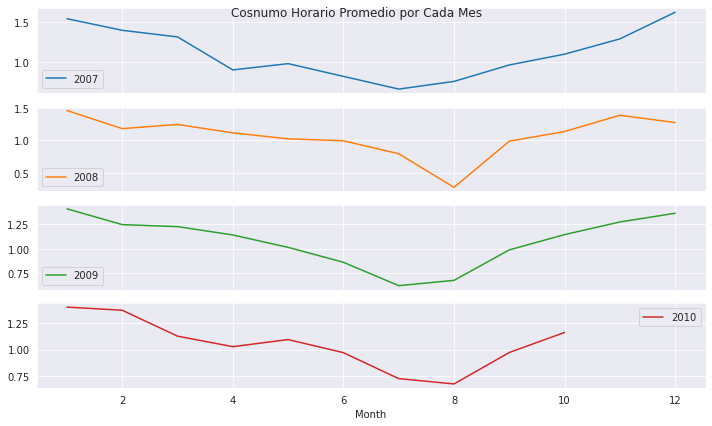

In [ ]:
pd.pivot_table(data_x_plots.loc[data_x_plots['Year'] != 2006], values = "Potencia_Activa",
        columns = "Year", index = "Month").plot(subplots = True, figsize=(10, 6), layout=(4, 1), sharex=True, grid=True, title = "Cosnumo Horario Promedio por Cada Mes")

plt.xscale('linear')

plt.tight_layout()
plt.show()

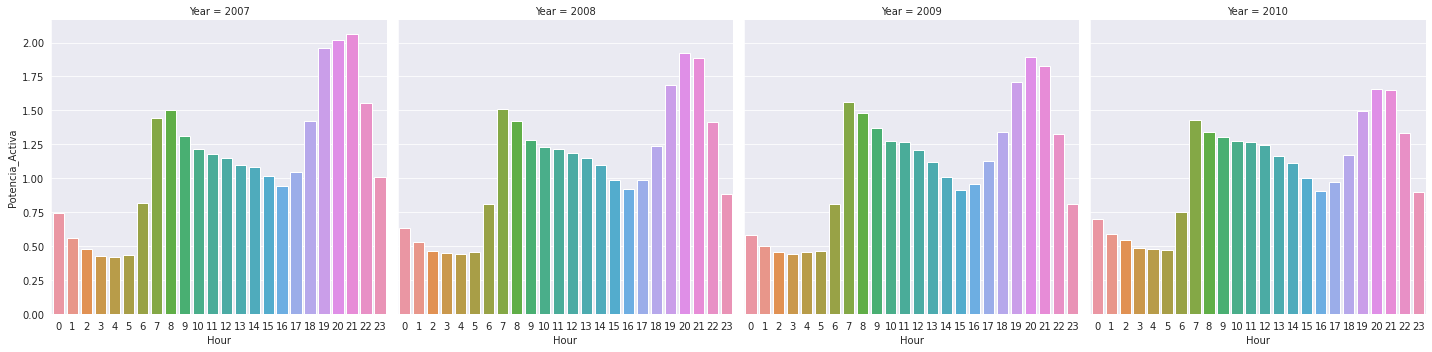

In [ ]:
summary = data_x_plots.groupby(by=['Year','Month','Day','Hour'],
                                    as_index=False)[['Potencia_Activa']].mean()

hour_plot = sns.catplot(x="Hour", y="Potencia_Activa", data=summary,
        kind="bar",
        col="Year",
        ci=None,
        )

plt.tight_layout()

In [ ]:
sumary_mena = data_x_plots.groupby(
    by=['Year','Month','Day'],
    as_index=False)[['Potencia_Activa']].mean()

In [ ]:
summary_min = data_x_plots.groupby(
    by=['Year','Month','Day'],
    as_index=False)[['Potencia_Activa']].min()

In [ ]:
summary_max = data_x_plots.groupby(
    by=['Year','Month','Day'],
    as_index=False)[['Potencia_Activa']].max()

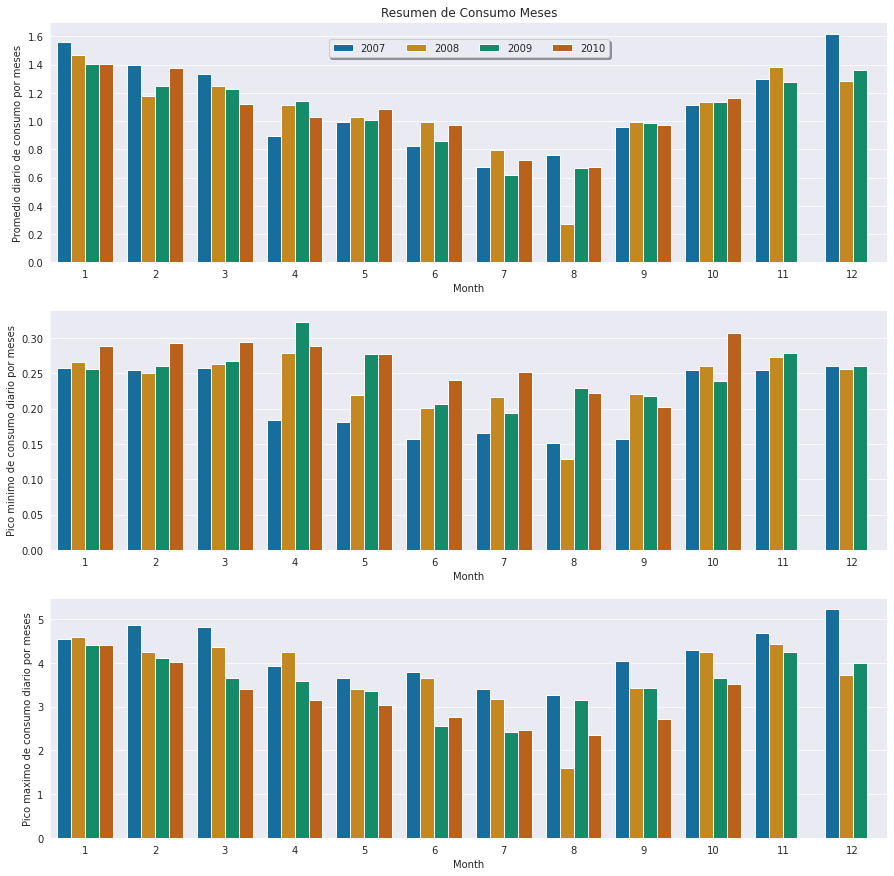

In [ ]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3, figsize=(15, 15), sharex=False)

# Subplot de Media Mensual
mean = sns.barplot(x = summary.Month,
            y = summary.Potencia_Activa,
            hue = summary.Year,
            palette = "colorblind",
            ax=axes[0],
            ci=None)
mean.set_title('Resumen de Consumo Meses')
mean.set_ylabel('Promedio diario de consumo por meses')
mean.legend_.remove()

# Subplot de Consumo Minimo Mensual
min = sns.barplot(x = summary_min.Month,
            y = summary_min.Potencia_Activa,
            hue = summary_min.Year,
            palette="colorblind",
            ax=axes[1],
            ci=None)
min.legend_.remove()
min.set_ylabel('Pico minimo de consumo diario por meses')

# Subplot de Consumo Pico Mensual
max = sns.barplot(x = summary_max.Month,
            y = summary_max.Potencia_Activa,
            hue = summary_max.Year,
            palette="colorblind",
            ax=axes[2],
            ci=None) 
max.set_ylabel('Pico maximo de consumo diario por meses')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 3.35), shadow=True, ncol=5)
